In [89]:
import pandas as pd

from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout, Bidirectional
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from keras.layers.merge import Concatenate
import matplotlib.gridspec as gridspec

import datetime
from datetime import date
from pandas_datareader import data as pdr

In [ ]:
#https://towardsdatascience.com/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python-1d1076fc89a0

In [65]:
df=pd.read_csv('london_merged.csv', parse_dates=['timestamp'], index_col="timestamp")
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
print(df)

                      cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  hour  day_

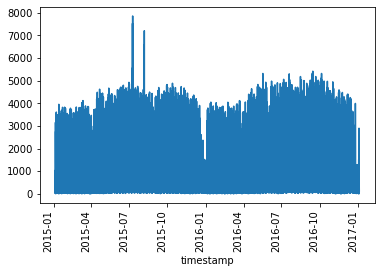

In [175]:
plt.clf()

grouped.plot()
plt.xticks(rotation=90)
plt.show("bike share detail trend")
plt.show()

In [13]:
print("Our goal is to predict the number of future bike shares given the historical data of London bike shares.")

Our goal is to predict the number of future bike shares given the historical data of London bike shares.


In [99]:
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

def create_dataset2(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [178]:
#COLUMNS=['cnt']
#dataset=df[COLUMNS]
#dataset=np.array(dataset).reshape(-1,1)
#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(np.array(dataset).reshape(-1,1))
#train_size = int(len(dataset) * 0.70)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
#print(len(train), len(test))

look_back=10
trainX=[]
testX=[]
y_train=[]

In [177]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
f_columns = ['t1', 't2', 'hum', 'wind_speed']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [179]:
cnt_transformer = RobustScaler()
cnt_transformer = cnt_transformer.fit(train[['cnt']])
train['cnt'] = cnt_transformer.transform(train[['cnt']])
test['cnt'] = cnt_transformer.transform(test[['cnt']])

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [180]:
#trainX, y_train = create_dataset(train, look_back)
#testX, y_test = create_dataset(test, look_back)
#X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#X_test = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

X_train, y_train = create_dataset2(train, train.cnt, look_back)
X_test, y_test = create_dataset2(test, test.cnt, look_back)



In [181]:
print(X_train.shape, y_train.shape)

(12179, 10, 13) (12179,)


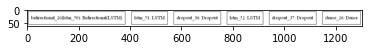

In [148]:
n_future = 1
#features=2
timeSteps=10

model = Sequential()

#model.add(Bidirectional(LSTM(units=50, return_sequences=True, 
#                             input_shape=(X_train.shape[1], 1))))

model.add(Bidirectional(LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))


model.add(LSTM(units= 128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 128))
model.add(Dropout(0.2))
model.add(Dense(units = n_future))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])



plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

In [149]:
history=model.fit(X_train, y_train,epochs=10,batch_size=32,
    validation_split=0.1,
    shuffle=False  )

Train on 9394 samples, validate on 1044 samples
Epoch 1/10
9394/9394 [==============================] - 18s 2ms/step - loss: 0.3675 - acc: 0.0000e+00 - val_loss: 0.2929 - val_acc: 0.0000e+00
Epoch 2/10
9394/9394 [==============================] - 14s 2ms/step - loss: 0.1944 - acc: 0.0000e+00 - val_loss: 0.2193 - val_acc: 0.0000e+00
Epoch 3/10
9394/9394 [==============================] - 20s 2ms/step - loss: 0.1212 - acc: 0.0000e+00 - val_loss: 0.0722 - val_acc: 0.0000e+00
Epoch 4/10
9394/9394 [==============================] - 15s 2ms/step - loss: 0.0777 - acc: 0.0000e+00 - val_loss: 0.0689 - val_acc: 0.0000e+00
Epoch 5/10
9394/9394 [==============================] - 19s 2ms/step - loss: 0.0617 - acc: 0.0000e+00 - val_loss: 0.0445 - val_acc: 0.0000e+00
Epoch 6/10
9394/9394 [==============================] - 19s 2ms/step - loss: 0.0538 - acc: 0.0000e+00 - val_loss: 0.0463 - val_acc: 0.0000e+00
Epoch 7/10
9394/9394 [==============================] - 20s 2ms/step - loss: 0.0438 - acc: 0.0

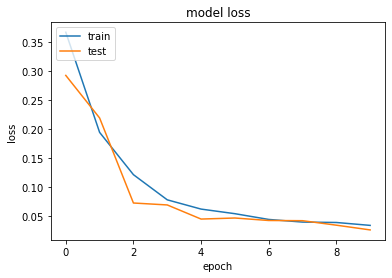

In [155]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

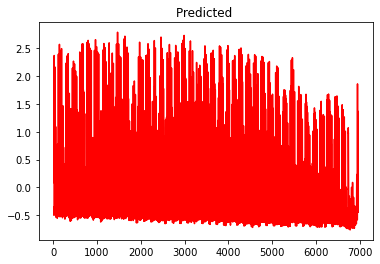

In [156]:
#print(X_test)
prediction = model.predict(X_test)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(prediction)+look_back, :] = prediction
# shift test predictions for plotting
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color='red')
plt.title("Predicted ")
#plt.plot(testPredictPlot)
#plt.legend(['Actual','Train','Test'])
plt.show()

[-0.37709285 -0.48363775 -0.54680365 ... -0.34512938 -0.43112633
 -0.49581431]


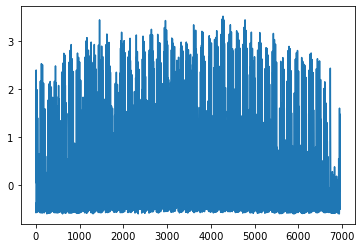

In [162]:
print(y_test)
#plt.plot(X_test.reshape(-1,1))
#plt.title('Actual test dataset')
#plt.show()
plt.plot(y_test)
plt.title('Actual test dataset')
plt.show()